# Time Series

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-Processing

In [7]:
data = pd.read_csv("AirPassengers.csv")

In [8]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
data['Month'] = pd.to_datetime(data['Month'])

In [12]:
type(data['Month'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
data.set_index(data['Month'],inplace=True)

In [17]:
data.drop(columns='Month',inplace=True)

In [18]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Feature Engineering

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
#ETS - Decomposition
ETS = seasonal_decompose(data)
trend = ETS.trend
seasonality = ETS.seasonal

<AxesSubplot:xlabel='Month'>

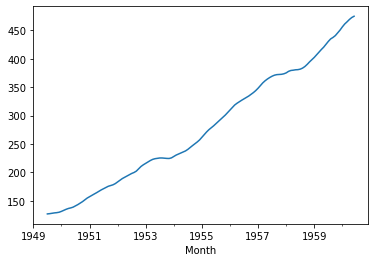

In [25]:
trend.plot()

<AxesSubplot:xlabel='Month'>

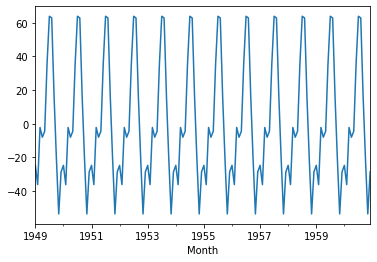

In [27]:
seasonality.plot()

# Checking for stationarity

### Rolling stat

In [29]:
mean = data.rolling(window=12).mean()
std = data.rolling(window=12).std()

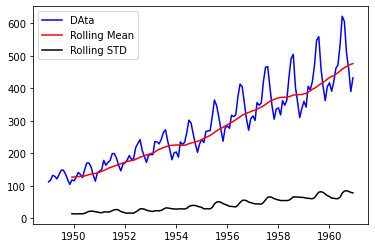

In [34]:
plt.plot(data,color='b',label='DAta')
plt.plot(mean,color='r',label='Rolling Mean')
plt.plot(std,color='black',label='Rolling STD')
plt.legend()

### ADF Test

### Null hypo = data is not stat

In [41]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
labels=["Test Stat","p-value","number of Lags","Number of observations"]
for value,label in zip(result,labels):
    print(label," : ",str(value))
if(result[1] < 0.05):
    print("Data is stat")
else:
    print("Not stat")

Test Stat  :  0.8153688792060411
p-value  :  0.9918802434376409
number of Lags  :  13
Number of observations  :  130
Not stat


# To make stat

### we can make stat using differencing method

In [44]:
from pmdarima.arima.utils import ndiffs
print("Number of differencing required : ",ndiffs(data))

Number of differencing required :  1


<AxesSubplot:xlabel='Month'>

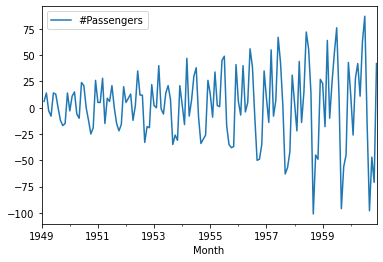

In [46]:
data.diff(periods=1).plot()

### Finding P and Q

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


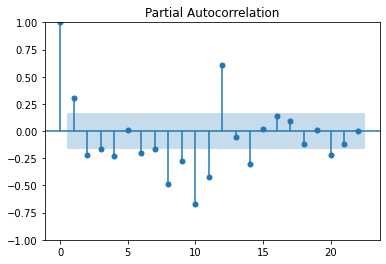

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_pacf(data.diff(periods=1).dropna());

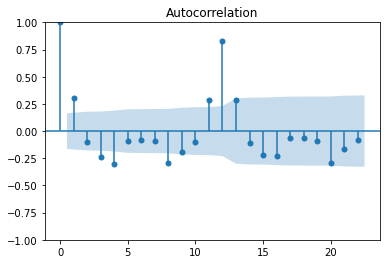

In [51]:
plot_acf(data.diff(periods=1).dropna());

# ARIMA

In [67]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data,order=(2,1,2))
result = model.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
pred = result.forecast(12)

<AxesSubplot:>

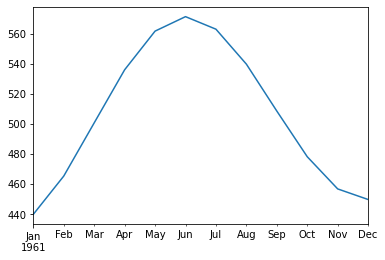

In [69]:
pred.plot()

In [70]:
res = pd.DataFrame(pred)
res.columns=['#Passengers']
ts_data_pred = pd.DataFrame(data)
ts_data_pred = ts_data_pred.append(res)

C:\Users\admin\AppData\Local\Temp\ipykernel_12764\1929069152.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_data_pred = ts_data_pred.append(res)


<AxesSubplot:>

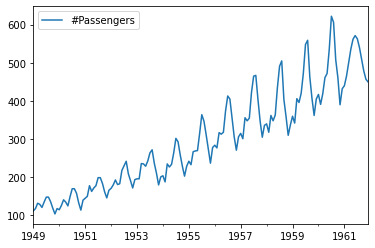

In [71]:
ts_data_pred.plot()